In [78]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
Author: satoshi tsustsui

This is a sample code that generates scene graph from image via caption.
Pipline will be: 

image -> caption -> scene_graph.

image -> caption is done by https://github.com/apple2373/chainer_caption_generation/
This git repo is also made by Satoshi Tsutsui.

caption -> scene_graph is done by http://nlp.stanford.edu/software/scenegraph-parser.shtml
This is the progeam developed by Stanford NLP lab. I call their java program by python.
This use py4j to call java from python. Java 1.8+ and Python 2.7x is required.
You should set up parser in advance by the following command: 
java -jar SecneGraphParserPython.jar 

'''
import sys
sys.path.append('../')

import numpy as np
from chainer_caption_generation.codes.image_reader import Image_reader
from chainer_caption_generation.codes.caption_generator import Caption_generator

#make sure the java commad is excuted in adcace
from py4j.java_gateway import JavaGateway
gateway = JavaGateway()
parser = gateway.entry_point.getGraphGenerator() 

#Instantiate image_reader with GoogleNet mean image
mean_image = np.array([104, 117, 123]).reshape((3,1,1))
image_reader=Image_reader(mean=mean_image)

#Instantiate caption generator
caption_model_place='../chainer_caption_generation/models/caption_model.chainer'
cnn_model_place='../chainer_caption_generation/data/bvlc_googlenet_caffe_chainer.pkl'
index2word_place='../chainer_caption_generation/work/index2token.pkl'
caption_generator=Caption_generator(caption_model_place=caption_model_place,cnn_model_place=cnn_model_place,index2word_place=index2word_place)

In [79]:
import matplotlib.pyplot as plt
from PIL import Image as PIL_Image
import matplotlib
%matplotlib inline
import re

caption
a living room filled with furniture and a flat screen tv
scene graph
[[u'room-3', u'fill with', u'furniture-6'], [u'room-3', u'fill with', u'tv-11']]
[[u'tv-11', u'is', u'flat']]


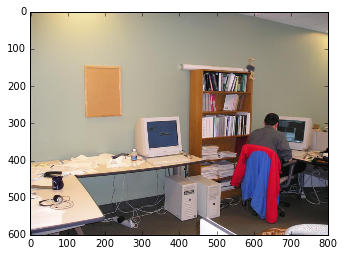

In [81]:
#read an image as numpy arrays
image_id=10
image_file_path="../data/images/%d.jpg"%image_id
image=image_reader.read(image_file_path)
caption=caption_generator.get_top_sentence(image)
parser.parse_caption(caption)

img = PIL_Image.open(image_file_path)
plt.imshow(img)

print "caption"
print caption
print "scene graph"
print parser.get_relations()
print parser.get_attributes()

In [61]:
truth=[[u'room', u'fill with', u'furniture'],#only this is correct
 [u'shelf', u'has', u'books'],
 [u'cpu', u'on', u'floor'],
 [u'cpu', u'on', u'floor'],
 [u'coat', u'on', u'chair'],
 [u'ostirch', u'on top of', u'bookshelf'],
]

infered_relation=[[u'room-3', u'fill with', u'furniture-6'], [u'room-3', u'fill with', u'tv-11']]

#remove number
infered_relation=[(\
                   re.sub("\\-\d+", "", triple[0]),\
                   triple[1],\
                   re.sub("\\-\d+", "", triple[2]),\
                  ) for triple in infered_relation]

In [87]:
def jaccard(s1, s2):
	s1=[ "-".join(triple) for triple in s1]
	s2=[ "-".join(triple) for triple in s2]
	st1=set(s1)
	st2=set(s2)
	u = set(st1).union(st2)
	i = set(st1).intersection(st2)
	return float(len(i))/float(len(u))

In [88]:
jaccard(infered_relation,truth)

0.16666666666666666

In [90]:
t1=[["a1","b1","c1"],["a2","b2","c2"],["a3","b3","c3"]]
t2=[["a3","b3","c3"],["a4","b4","c4"],["a5","b5","c5"]]
jaccard(t1,t2)

0.2